# **A deep dive into the NYC CitiBikes Usage Pattern**

**Group A5**
- Dylan Kakkanad (Project Manager)
- Boyuan Chen
- Chirayu (Mitthi) Jain
- Lyushen Song
- Neeharika Kamireddy
- Pengru Lin


**Table of Contents**
1. [Project Proposal](#scrollTo=YJV49Dpq4q_o)
2. [Report Summary](#scrollTo=vtWnwWmH5BIZ)
3. [Introduction & Motivation](#scrollTo=cK5rqDWATjYD)
4. [Data & Data Source](#scrollTo=9XUFNQfnVIE_)
5. [Data Manipulation & Cleaning](#scrollTo=vj8CmY_rV3YL)
6. [Questions & Exploratory Data Analysis](#scrollTo=I9txYOypZqVw)
7. [Challenges](#scrollTo=kLyymQ09h9TU)
8. [Conclusions & Key Observations](#scrollTo=TIWHf3NwiTMh)
9. [Reference](#scrollTo=rRHXdW1Ritj1&line=2&uniqifier=1)

# 1. Project Proposal
Our goal is to conduct a user behavior analysis on customers using Citibikes in the city of New York in order to help Citibike drive efficiencies and expand into new locations as well as demographics. We will conduct an exploratory data analysis and make visualizations to help us:

* Identify which stations are popular start/end points throughout the year
* Identify how different genders/age groups use the bikes
* How subscribers vs customers use the bikes
* Identify how bike usage relates to holiday/season
* Identify the number of times on average a bike can be used annually
* Identify any patterns (if there is any) relating to the popularity of bike stations


# 2. Report Summary

 In this project, we have analyzed the New York City Citibikes 2014 dataset. We gained the rental bikes data from their website and came up with analytical results. We have made user behavioral analysis using user specific data, geographical data for location specific analysis and trip duration analysis. With all this information, we made a couple of recommendations (which can be found in the Summary section) for Citibikes team.


<a id="1"></a>
# 3. Introduction & Motivation
Every weekday morning, millions of workers step out of their doors with the hopes to reach the workplace on-time. Some drive cars, some people walk, while others have to rely on different means of public transportation. In New York City in 2014, there were roughly 3.6 million workers, and 55.6% of them rely on public transportation to get to work. According to the GlobeNewswire Article: “NYC respondents spent an average of 149 minutes on public transport each day, 38 minutes (26 percent) idly waiting for the bus or train to arrive, with a 40 percent dissatisfaction rate”. This time spent is considered to be 'process loss', which would cause the workers to be late to work, getting less leisure time, and eventually prevent the workers from reaching their full potential.


This is where the Citibike comes in, an alternative solution for NYC residents who don’t have cars, don’t want to use taxis due to high fares and traffic, or those who live further from subway stops or don’t find the subway the most efficient for their route. Citibike is an affordable, convenient, and easy to use solution for NYC residents. We are motivated to provide Citibike with an analysis of user behavior to improve the quality of service in NYC, and also expand into other boroughs and increase accessibility to the bikes for more residents. With NYC as a successful prototype, Citibike will then be able to expand into other untapped markets across the country, improving quality of life for many residents and also helping everyone reduce their carbon footprint.

# 4. Data & Data Source

The dataset is collected and distributed directly by Citibike. We have downloaded it from the Citibike website directly: https://citibikenyc.com/system-data

Each row in the dataset represents a trip taken on a Citibike in NYC and each column represents the trip’s attributes, as described below:


| Column | Description | Dtype | Null | Variable Type | Transformation |
|--------|-------------|-------|------|------------------------|---------------|
| 1. `tripduration` | How long the bike trip was in seconds | int64 | No | Numeric |  |
| 2. `starttime` | What time was the trip started and on what date | object | No | Numeric | convert to datetime + slicing into months, weekday and hour |
| 3. `stoptime` | What time the trip ended and on what date | object | No | Numeric |  |
| 4. `start station id` | Numerical identification of start station  | int64 | No | Numeric |  |
| 5. `start station name` | Official name of the station where the bike was picked up| object | No | String |  |
| 6. `start station latitude` | Latitude coordinates of start station | float64 | No | Numeric |  |
| 7. `start station longitude` | Longitude coordinates of start station | float64 | No | Numeric |  |
| 8. `end station id` | Numerical identification of end station  | int64 | No | Numeric |  |
| 9. `end station name` | Official name of the station where the bike was dropped off| object | No | String |  |
| 10. `end station latitude` | Latitude coordinates of end station | float64 | No | Numeric |  |
| 11. `end station longitude` | Longitude coordinates of end station| float64 | No | Numeric |  |
| 12. `bikeid` | Numerical identification of bike | int64 | No | Numeric |  |
| 13. `usertype` | Customer = 24-hour pass or 3-day pass user; Subscriber = Annual Member | object | No | Categorical |  |
| 14. `birth year` | Birth year of the rider | object | Yes | Numerical | Calculate `Age`  |
| 15. `gender` | 0=unknown; 1=male; 2=female | int64 | Yes | Categorical | Remove unknowns |
| 16. `weekend` | 0=weekday; 1=weekend| int64 | Yes | Categorical | using `startdate` check if day was weekend or a weekday |
| 17. `holiday` | 0=workday; 1=holiday| int64 | Yes | Categorical | Check if day was a workday or a holiday |

<a id="2"></a>
# 5. Data manipulation & cleaning

##5.1 Download & import libraries

In [ ]:
# Download necessary libraries
!pip3 install plotly_express

In [ ]:
#Import libraries
import pandas as pd
import geopy
import numpy as np
import missingno as msno
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import json
import plotly_express as px
import glob
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch
import plotly.graph_objects as go
import matplotlib.dates as mdates
%matplotlib inline

##5.2 Mount google drive & load data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


All the 12 months of 2014  were combined to make our dataframe

In [ ]:
# Get CSV files list from a folder
path = '/content/gdrive/MyDrive/BA_780_Group_Data'
csv_files = glob.glob( path+ "/*.csv")

# Read each CSV file into DataFrame
# This creates a list of dataframes
df_list = (pd.read_csv(file) for file in csv_files)

# Concatenate all DataFrames
big_df   = pd.concat(df_list, ignore_index=True)

In [ ]:
big_df.to_csv('/content/gdrive/MyDrive/BA_780_Group_Data/merged_dataset.csv', index=False)

##5.3 Data cleaning & feature engineering

In [ ]:
df_filtered = pd.read_csv('/content/gdrive/MyDrive/BA_780_Group_Data/merged_dataset.csv')

<ipython-input-4-c24334ec53a8>:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df_filtered = pd.read_csv('/content/gdrive/MyDrive/BA_780_Group_Data/merged_dataset.csv')


<Axes: >

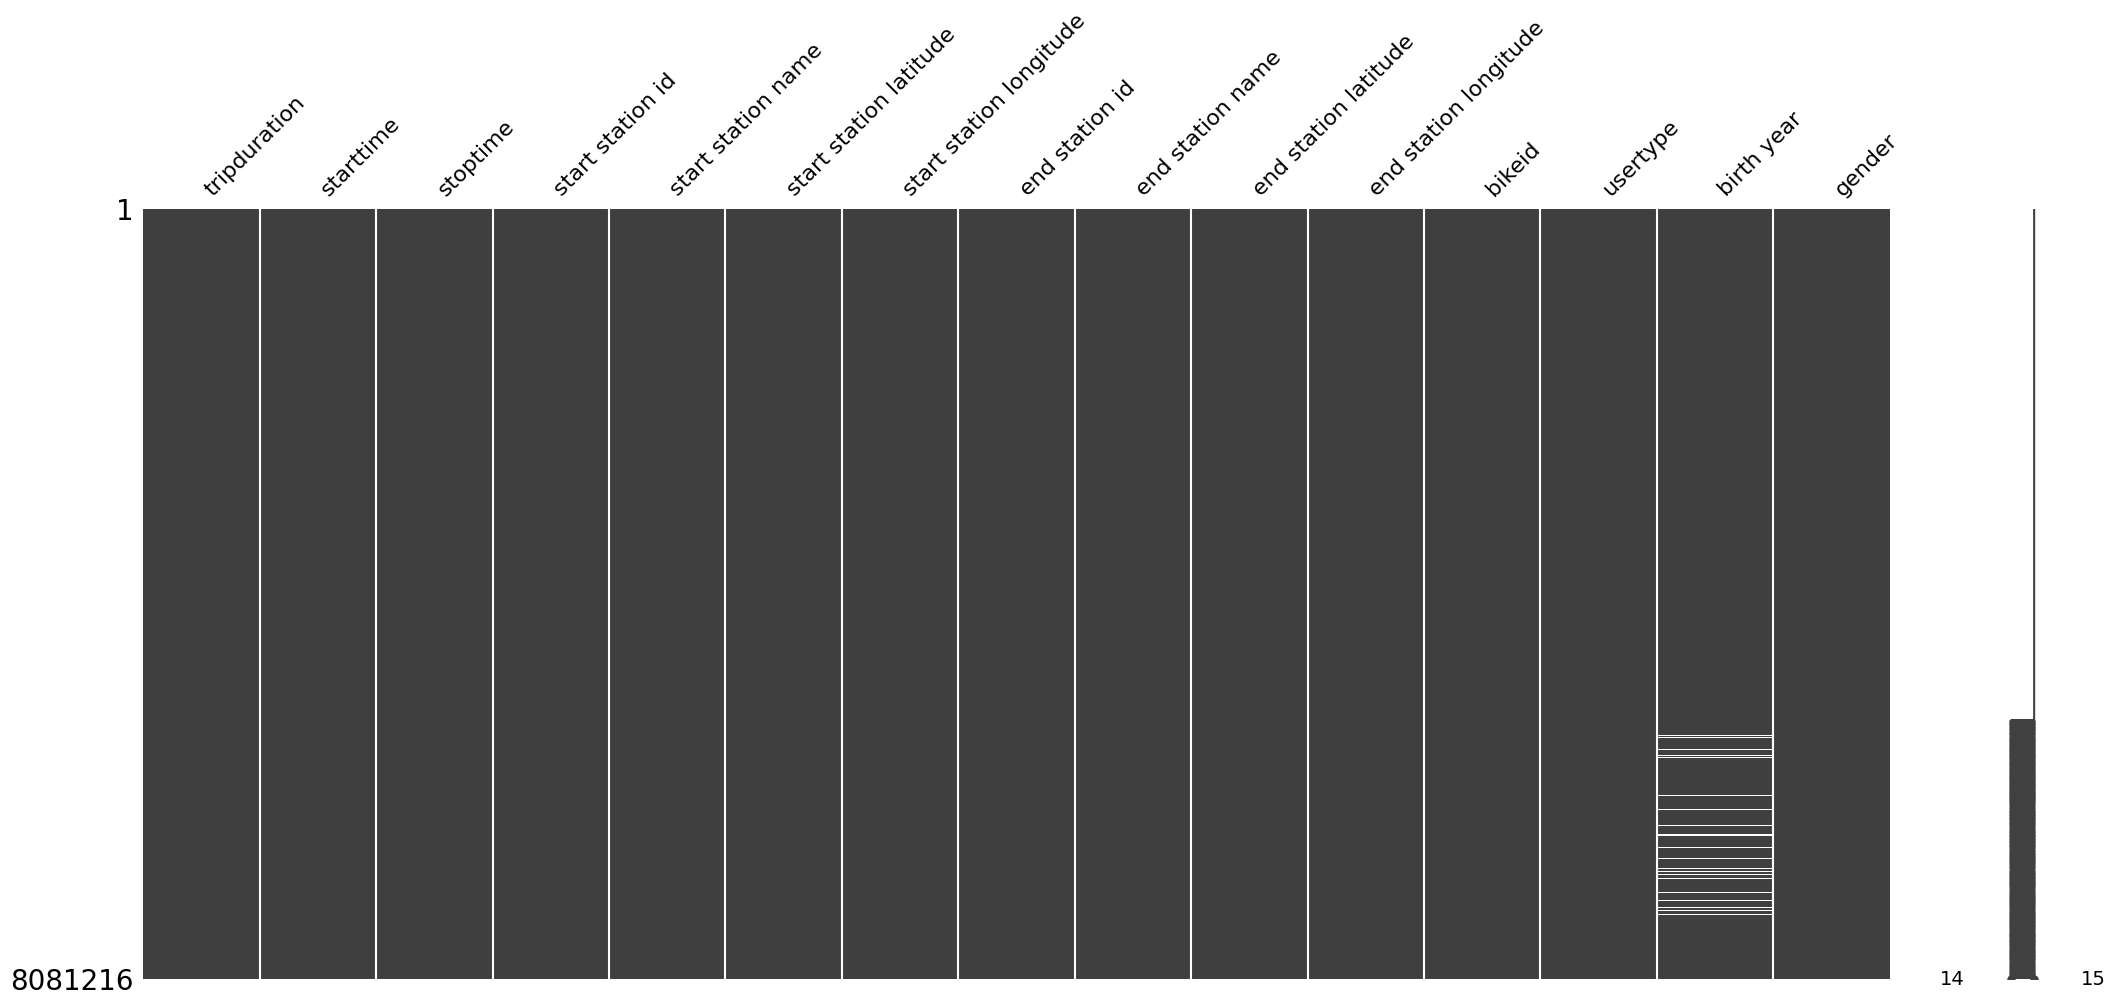

In [ ]:
msno.matrix(df_filtered)

This graph helps us in two ways:
* It tells us that ```birth year``` is the only column with NaN values. As mentioned in the challenges section of this project, it is very likely that the column was a user input and therefore erroneous to a certain degree.
* The important caveat being that this only includes actual NaN values. other missing data classified manually as 'unknown' (like in ```gender```) are not considered but they also have to be dropped.

In [ ]:
from datetime import datetime
df_filtered['starttime'] = pd.to_datetime(df_filtered['starttime'])

# Note: Monday=0, Sunday=6
df_filtered['weekend'] = df_filtered['starttime'].dt.weekday.isin([5, 6]).astype(int)
# Display the first few rows to verify the changes
df_filtered.head(2)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,weekend
0,471,2014-01-01 00:00:06,2014-01-01 00:07:57,2009,Catherine St & Monroe St,40.711174,-73.996826,263,Elizabeth St & Hester St,40.717290,-73.996375,16379,Subscriber,1986,1,0
1,1494,2014-01-01 00:00:38,2014-01-01 00:25:32,536,1 Ave & E 30 St,40.741444,-73.975361,259,South St & Whitehall St,40.701221,-74.012342,15611,Subscriber,1963,1,0


In [ ]:
#US national holidays for 2014
holidays_2014 = [
    "2014-01-01",  # New Year's Day
    "2014-01-20",  # Martin Luther King, Jr. Day
    "2014-02-17",  # Washington's Birthday
    "2014-05-26",  # Memorial Day
    "2014-07-04",  # Independence Day
    "2014-09-01",  # Labor Day
    "2014-10-13",  # Columbus Day
    "2014-11-11",  # Veterans Day
    "2014-11-27",  # Thanksgiving Day
    "2014-12-25"   # Christmas Day
]
# Create the 'holiday' column
df_filtered['holiday'] = df_filtered['starttime'].dt.date.astype(str).isin(holidays_2014).astype(int)
# Display the first few rows to verify the changes
df_filtered.head(2)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,weekend,holiday
0,471,2014-01-01 00:00:06,2014-01-01 00:07:57,2009,Catherine St & Monroe St,40.711174,-73.996826,263,Elizabeth St & Hester St,40.717290,-73.996375,16379,Subscriber,1986,1,0,1
1,1494,2014-01-01 00:00:38,2014-01-01 00:25:32,536,1 Ave & E 30 St,40.741444,-73.975361,259,South St & Whitehall St,40.701221,-74.012342,15611,Subscriber,1963,1,0,1


Few rows of birth year had incoherent values that needed to be discarded from the dataset.

In [ ]:
#Removing incorrect rows
df_filtered = df_filtered[df_filtered['birth year'] != '\\N']

In [ ]:
len(df_filtered[df_filtered.usertype == 'Customer'])

212938

In [ ]:
df_filtered.to_csv('/content/gdrive/MyDrive/BA_780_Group_Data/dataset_compare.csv', index=False)

In [ ]:
df1=pd.read_csv('/content/gdrive/MyDrive/BA_780_Group_Data/dataset_compare.csv')

As mentioned in the msno matrix and the data table in section 4. ```gender``` had missing values marked as '0' which stood for unknowns. This is discarded as well. As a next step we will remove null values from ```birth year``` as well as it contains quite a few missing values.

In [ ]:
#Ignoring unknown gender values
df_filtered =df_filtered[df_filtered['gender'] != 0]

In [ ]:
#Remove null birth years
df_filtered.dropna(subset=['birth year'],inplace=True)

<ipython-input-15-33d671a7979e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(subset=['birth year'],inplace=True)


<a id="3"></a>
# 6. Questions & exploratory data analysis

##6.1 Questions regarding Citibike usage patterns among different users.

---
**6.1.1 How do bike usage patterns vary between subscribers and customers across different days (workday, weekends, holidays) and which group should we pay more attention to?**

---


Analyzing user behavior patterns such as peak usage hours is pivotal to services like bike-sharing. It not only identifies what time users are most likely to be active, aiding decisions about bike availability, station maintenance, and marketing initiatives, but also improves operational efficiency by ensuring resource allocation aligns with the market demand. Segmenting users, for example, into subscribers and occasional customers, allows for tailored marketing strategies. What’s more, distinguishing between regular weekdays and special days like weekends and holidays makes the service anticipate and cater to varying usage patterns, from leisure rides in parks during holidays to daily work or school commutes.



In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/BA_780_Group_Data/merged_dataset.csv')
df.head(2)

<ipython-input-20-b3ec3f4892d9>:22: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data_subscriber = hourly_trips_usertype[hourly_trips_usertype['usertype'] == 'Subscriber'].pivot('hour', 'day_type', 'trip_count')
<ipython-input-20-b3ec3f4892d9>:23: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data_customer = hourly_trips_usertype[hourly_trips_usertype['usertype'] == 'Customer'].pivot('hour', 'day_type', 'trip_count')


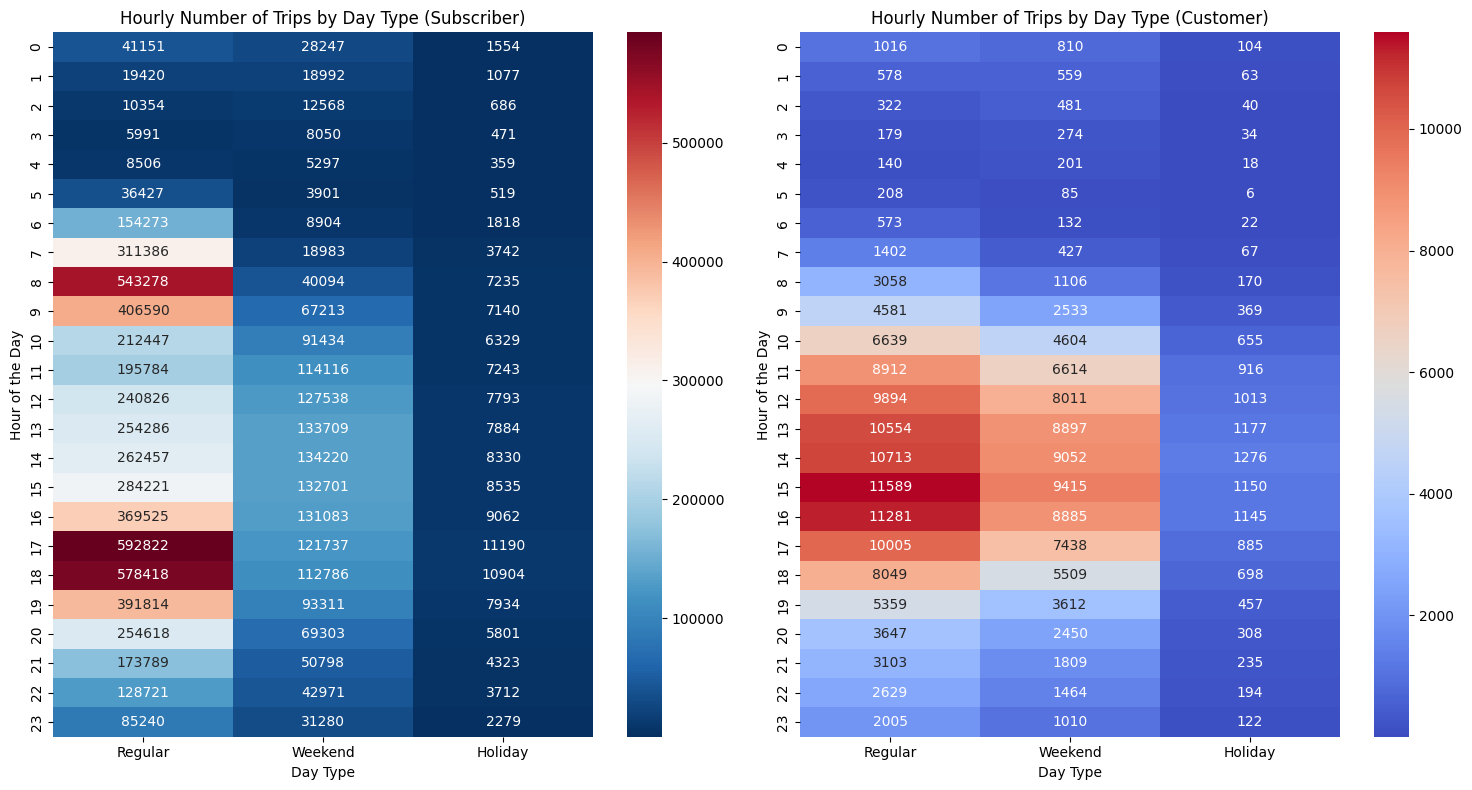

In [ ]:
# Initially set all rows to 'Weekday'
df1['day_type'] = 'Weekday'

# Update rows where 'weekend' is 1 to 'Weekend'
df1.loc[df1['weekend'] == 1, 'day_type'] = 'Weekend'

# Update rows where 'holiday' is 1 to 'Holiday'
df1.loc[df1['holiday'] == 1, 'day_type'] = 'Holiday'

# Extract the hour from the 'starttime' column
df1['hour'] = pd.to_datetime(df1['starttime']).dt.hour

# Group data by hour, day type, and usertype to compute the total number of trips
hourly_trips_usertype = df1.groupby(['hour', 'day_type', 'usertype']).size().reset_index(name='trip_count')

# Pivot the data for heatmap for each usertype
heatmap_data_subscriber = hourly_trips_usertype[hourly_trips_usertype['usertype'] == 'Subscriber'].pivot('hour', 'day_type', 'trip_count')
heatmap_data_customer = hourly_trips_usertype[hourly_trips_usertype['usertype'] == 'Customer'].pivot('hour', 'day_type', 'trip_count')

# Adjust columns if needed (in case one user type lacks a specific day type)
columns_order = ['Weekday', 'Weekend', 'Holiday']
heatmap_data_subscriber = heatmap_data_subscriber.reindex(columns=columns_order)
heatmap_data_customer = heatmap_data_customer.reindex(columns=columns_order)

# Create subplots with colorblind-friendly palettes
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))

# Heatmap for Subscribers with colorblind-friendly palette
sns.heatmap(heatmap_data_subscriber, cmap='RdBu_r', annot=True, fmt='d', ax=ax1)
ax1.set_title('Hourly Number of Trips by Day Type (Subscriber)')
ax1.set_xlabel('Day Type')
ax1.set_ylabel('Hour of the Day')

# Heatmap for Customers with a complementary colorblind-friendly palette
sns.heatmap(heatmap_data_customer, cmap='coolwarm', annot=True, fmt='d', ax=ax2)
ax2.set_title('Hourly Number of Trips by Day Type (Customer)')
ax2.set_xlabel('Day Type')
ax2.set_ylabel('Hour of the Day')

plt.tight_layout()
plt.show();


The heatmap reveals distinct bike usage patterns between subscribers and customers. On weekdays, subscribers predominantly use the service during typical work commute hours in the morning and afternoon, implying a reliance on it for daily commutes. In contrast, customer usage is more dispersed, hinting at leisure or impromptu rides. Weekends and holidays display a mid-day usage surge for both user groups, likely reflecting leisure or recreational rides.

Overall, subscribers exhibit higher service utilization than customers, emphasizing their significance. The more predictable behavior of subscribers, compared to the varied patterns of customers, suggests a strategic focus on enhancing the ***subscriber experience*** would be beneficial.


In [ ]:
df_filtered = df_filtered[df_filtered.usertype == 'Subscriber']

In [ ]:
df_filtered.to_csv('/content/gdrive/MyDrive/BA_780_Group_Data/merged_dataset_subscriber.csv', index=False)

---
**6.1.2 What is the usage pattern for customers and why have they became a subscriber yet?**

---


Due to the current Citi Bikes pricing, choosing a single-pass ride that is above 30 minutes doesn't make sense financially. Becoming a subscriber would be a better deal. Therefore, I want to know how many these type of trips happened in the year 2014.

In [ ]:
df_customer = pd.read_csv('/content/gdrive/MyDrive/BA_780_Group_Data/merged_dataset.csv')
df_customer.head(2)

<ipython-input-5-1fe6723ede39>:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df_customer = pd.read_csv('/content/gdrive/MyDrive/BA_780_Group_Data/merged_dataset.csv')


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,471,2014-01-01 00:00:06,2014-01-01 00:07:57,2009,Catherine St & Monroe St,40.711174,-73.996826,263,Elizabeth St & Hester St,40.717290,-73.996375,16379,Subscriber,1986,1
1,1494,2014-01-01 00:00:38,2014-01-01 00:25:32,536,1 Ave & E 30 St,40.741444,-73.975361,259,South St & Whitehall St,40.701221,-74.012342,15611,Subscriber,1963,1


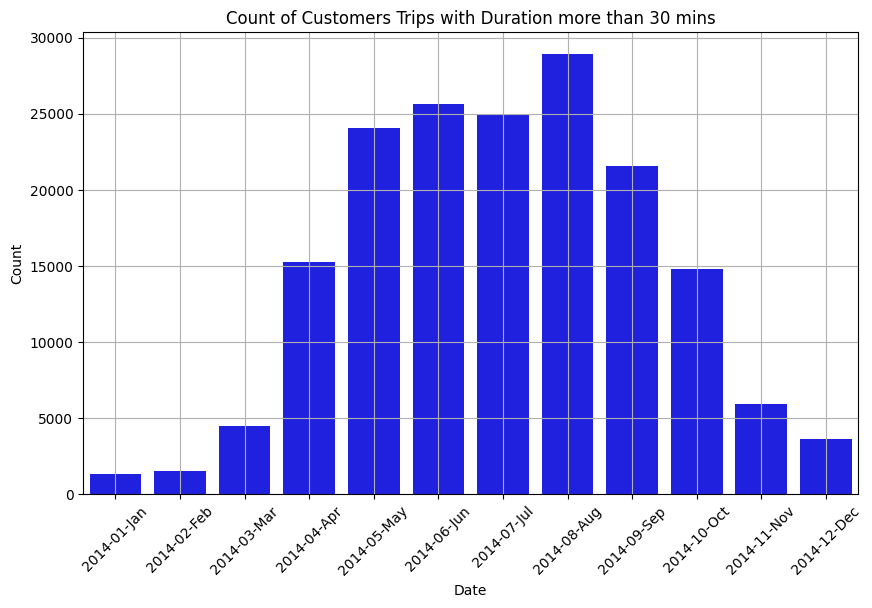

In [ ]:
plt.figure(figsize=(10, 6))

df_customer_30min = df_customer[(df_customer['tripduration'] > 1800) & (df_customer['usertype'] == 'Customer')].reset_index()

df_customer_30min['starttime'] = pd.to_datetime(df_customer_30min['starttime'])
df_customer_30min['month'] = df_customer_30min['starttime'].dt.strftime('%Y-%m-%b')

# Set the 'starttime' column as the DateTimeIndex
df_customer_30min.set_index('starttime', inplace=True)

# Resample to monthly data
monthly_trip = df_customer_30min.resample('M').size()

# Create the bar plot
ax = sns.barplot(x=monthly_trip.index, y=monthly_trip.values, color='blue')

# Set the axis to display labels for every month
ax.set_xticklabels(monthly_trip.index.strftime('%Y-%m-%b'), rotation=45)

plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Count of Customers Trips with Duration more than 30 mins')
plt.grid(True)
plt.show()

Based on the current Citi Bike pricing, becoming a subscriber to Citi Bike would cost someone 17.08 dollars per month. On the other hand, a single ride is priced at 4.49 dollars for the first 30 minutes, with an additional $0.23 per minute thereafter. Therefore, from a financial perspective, the average rider is better off becoming a subscriber.

However, from this visualization, it's evident that there are a significant number of trips that were paid for on a single-ride fee basis. This consumer behavior could be valuable for further exploration and for the Citi Bike marketing team to capture this untapped market.

---
**6.1.3 What is the Top 10 start and end stations for customers?**

---


Like many customers who opted not to become subscribers, I'd like to explore the top 10 start and end stations to identify any patterns.

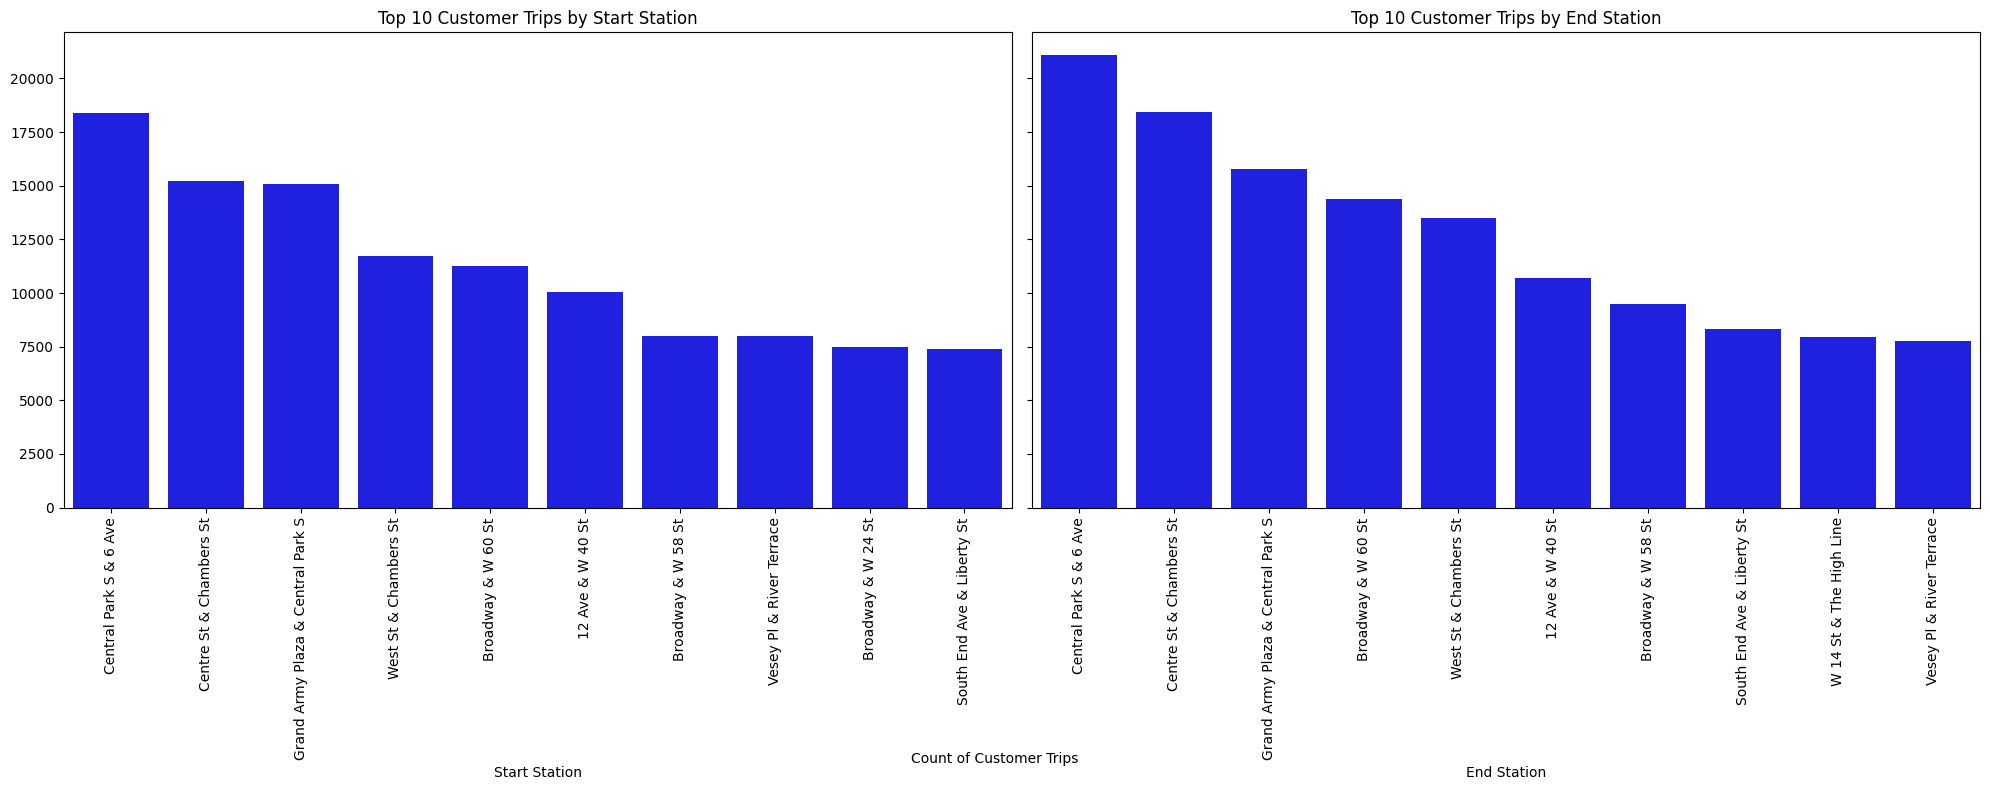

In [ ]:
#create a subplot to contain two plots
fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=True)

# First subplot: Top 10 Customer Trips by Start Station
customer_data = df_customer[df_customer['usertype'] == 'Customer'].reset_index()
customer_topstation = customer_data.groupby('start station name')['index'].count()
top_10_stations = customer_topstation.sort_values(ascending=False).head(10)
sns.barplot(x=top_10_stations.index, y=top_10_stations.values, color='blue', ax=axes[0])
axes[0].set_xticklabels(top_10_stations.index, rotation=90)
axes[0].set_xlabel('Start Station')
axes[0].set_title('Top 10 Customer Trips by Start Station')

# Second subplot: Top 10 Customer Trips by End Station
customer_data = df_customer[df_customer['usertype'] == 'Customer'].reset_index()
customer_topstation = customer_data.groupby('end station name')['index'].count()
top_10_stations = customer_topstation.sort_values(ascending=False).head(10)
sns.barplot(x=top_10_stations.index, y=top_10_stations.values, color='blue', ax=axes[1])
axes[1].set_xticklabels(top_10_stations.index, rotation=90)
axes[1].set_xlabel('End Station')
axes[1].set_title('Top 10 Customer Trips by End Station')

# Set a shared y-label
fig.text(0.5, 0.04, 'Count of Customer Trips', ha='center')
plt.tight_layout()

plt.savefig('Top 10 Customer Trips by Start and End Stations')

plt.show()


The top 10 most popular start and end stations have some overlaps, with most of them located in popular tourist spots, such as the south of Central Park and Brooklyn Bridge. The locations of these top 10 stations present an opportunity for the marketing and sales team to promote Citi Bike's monthly subscriber plan to customers.

---

**6.1.4 How do seasonal variations and weekend/holiday periods influence the daily number of shared bike trips throughout 2014?**

---

The motivation of doing time series visualization of shared bike usage, with distinctions for weekends and holidays, is to provide a multifaceted view of user behavior. It allows stakeholders to discern between daily patterns, distinguishing weekdays from weekends, and understanding the unique dynamics of holidays. Such insights can guide bike companies in operational decisions, from fleet management to pricing adjustments.

In [ ]:
df['date'] = pd.to_datetime(df['starttime']).dt.date
# Define colors
daily_trips_color = "#4b57db"
weekends_color = "#01c08d"
holidays_color = "#FF7F0E"
daily_trips_cleaned = df.groupby('date').size()
weekend_dates_cleaned = df[df['weekend'] == 1]['date'].unique()
holiday_dates_cleaned = df[df['holiday'] == 1]['date'].unique()
# Update the plot with new colors
# Create a basic line plot for daily trips
fig = go.Figure(go.Scatter(x=daily_trips_cleaned.index, y=daily_trips_cleaned.values, mode='lines', name='Daily Trips', line=dict(color=daily_trips_color)))
# Add a single trace for legend entry for weekends
fig.add_trace(
    go.Scatter(x=[weekend_dates_cleaned[0], weekend_dates_cleaned[0]], y=[0, max(daily_trips_cleaned.values)], mode='lines', name='Weekends', line=dict(color=weekends_color, width=1), showlegend=True)
)
# Add a single trace for legend entry for holidays
fig.add_trace(
    go.Scatter(x=[holiday_dates_cleaned[0], holiday_dates_cleaned[0]], y=[0, max(daily_trips_cleaned.values)], mode='lines', name='Holidays', line=dict(color=holidays_color, width=2), showlegend=True)
)
# Highlight weekends in the new color using shapes
for weekend in weekend_dates_cleaned:
    fig.add_shape(
        go.layout.Shape(type="line", x0=weekend, x1=weekend, y0=0, y1=max(daily_trips_cleaned.values), line=dict(color=weekends_color, width=1))
    )
# Highlight holidays in the new color using shapes
for holiday in holiday_dates_cleaned:
    fig.add_shape(
        go.layout.Shape(type="line", x0=holiday, x1=holiday, y0=0, y1=max(daily_trips_cleaned.values), line=dict(color=holidays_color, width=2))
    )


# Compute the average number of trips per day
average_trips = daily_trips_cleaned.mean()

# Add a horizontal dashed line indicating the average number of trips per day
fig.add_shape(
    go.layout.Shape(
        type="line",
        x0=min(daily_trips_cleaned.index),
        x1=max(daily_trips_cleaned.index),
        y0=average_trips,
        y1=average_trips,
        line=dict(color="red", width=2, dash="dot"),
        name="Average Trips"
    )
)

average_duration = daily_trips_cleaned.mean()

# Add an annotation to the figure indicating the average trip duration
fig.add_annotation(
    text=f"Average Trip: {average_duration:.2f} per day",
    xref="paper", yref="paper",
    x=0.05, y=0.95,  # position of the annotation in normalized coordinates (top-left corner)
    showarrow=False,
    font=dict(size=12, color="black"),
    bgcolor="white",
    bordercolor="black",
    borderwidth=1,
    borderpad=4
)

# Update layout and titles
fig.update_layout(title='Daily Number of Trips with Weekends and Holidays Highlighted', xaxis_title='Date', yaxis_title='Number of Trips')
fig.show()

The timeseries plot depicts the daily number of trips, with distinct highlights for weekends and holidays. Upon observation, we can discern seasonal patterns or anomalies in daily trips, particularly on weekends and holidays. From the graph it could be observed that:



*   The number of trips fluctuates and increases from January to September, but declines after September
*   the numbers of trips on holidays are always below avaerage, which might indicates that people in New York are less inclined to travel or commute on holidays or opt for other modes of transportation
*   The time series plot for 2014 consistently shows a marked decrease in shared bike usage every weekend



---

**6.1.5 How does the average trip duration of shared bike rides vary across the four seasons?**

---


 The boxplot for trip durations segmented by seasons aims to present a comprehensive view of biking patterns throughout the year. By analyzing the trip durations for each season, stakeholders can discern seasonal trends, variability, and potential outliers in biking behavior.

Season Identification:

In [ ]:
def get_season(date_str):
    # Extract month and day from the date string
    month, day = int(date_str[5:7]), int(date_str[8:10])

    # Categorize based on season date ranges
    if (month == 12 and day >= 21) or (month == 1) or (month == 2) or (month == 3 and day <= 20):
        return 'Winter'
    elif (month == 3 and day >= 21) or (month == 4) or (month == 5) or (month == 6 and day <= 20):
        return 'Spring'
    elif (month == 6 and day >= 21) or (month == 7) or (month == 8) or (month == 9 and day <= 22):
        return 'Summer'
    else:
        return 'Fall'

# Apply the function to the 'starttime' column
df['season'] = df['starttime'].apply(get_season)

# Display the first few rows with the new 'season' column
df[['starttime', 'season']].head(2)

,starttime,season
0,2014-01-01 00:00:06,Winter
1,2014-01-01 00:00:38,Winter
2,2014-01-01 00:03:59,Winter
3,2014-01-01 00:05:15,Winter
4,2014-01-01 00:05:18,Winter


In [ ]:
df['trip_duration_minutes'] = df['tripduration'] / 60
# Calculate the IQR for trip_duration_minutes for each season in the df dataframe
Q1_df = df.groupby('season')['trip_duration_minutes'].quantile(0.25)
Q3_df = df.groupby('season')['trip_duration_minutes'].quantile(0.75)
IQR_df = Q3_df - Q1_df

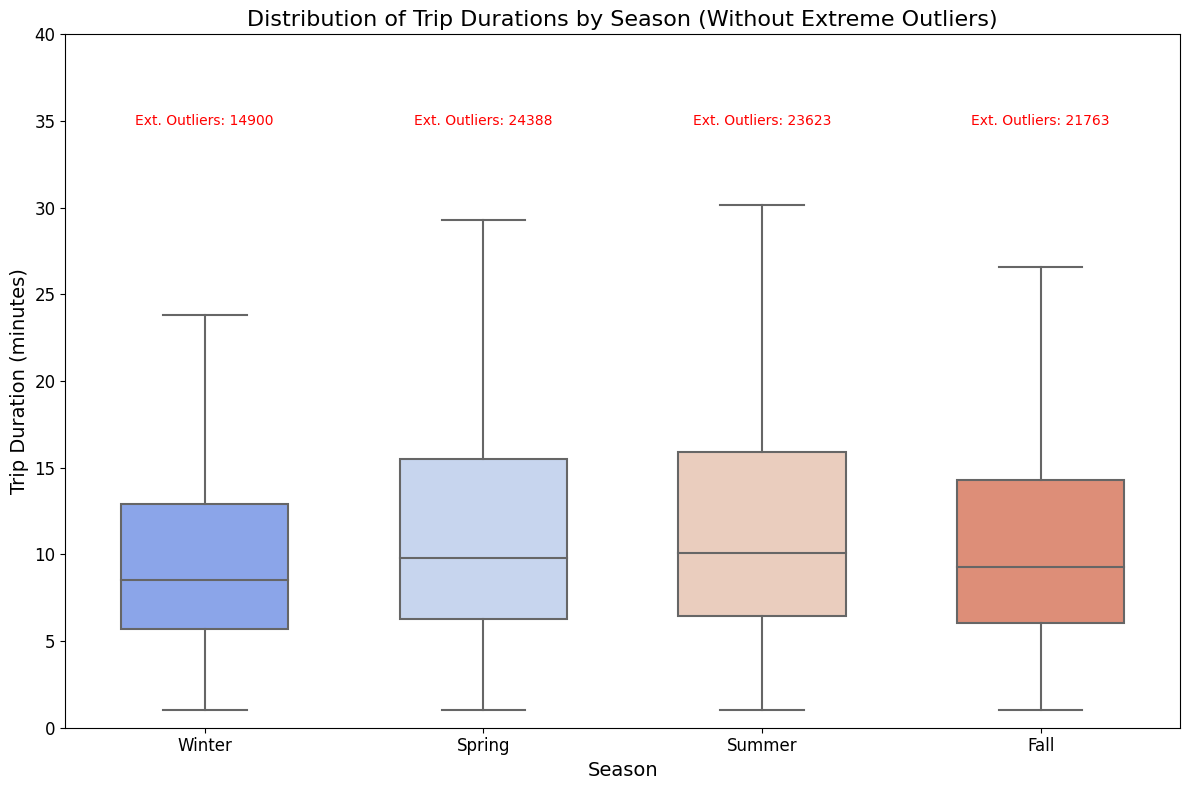

In [ ]:
# Identify and count the extreme outliers for each season using the outer fences
extreme_outliers_count = {}

for season in ["Winter", "Spring", "Summer", "Fall"]:
    season_data_df = df[df['season'] == season]
    # Check if there's data for the season
    if season in Q1_df.index:
        outliers_season = season_data_df[((season_data_df['trip_duration_minutes'] < (Q1_df[season] - 3 * IQR_df[season])) |
                                          (season_data_df['trip_duration_minutes'] > (Q3_df[season] + 3 * IQR_df[season])))]
        extreme_outliers_count[season] = len(outliers_season)

# Filter out extreme outliers for each available season in the df dataframe and store in a list
filtered_data_list_outer_fence = []

for season in ["Winter", "Spring", "Summer", "Fall"]:
    season_data_df = df[df['season'] == season]
    # Check if there's data for the season
    if season in Q1_df.index:
        filtered_data_season_df = season_data_df[~((season_data_df['trip_duration_minutes'] < (Q1_df[season] - 3 * IQR_df[season])) |
                                                  (season_data_df['trip_duration_minutes'] > (Q3_df[season] + 3 * IQR_df[season])))]
        filtered_data_list_outer_fence.append(filtered_data_season_df)

# Concatenate the filtered data for each available season
filtered_data_outer_fence = pd.concat(filtered_data_list_outer_fence)

# Create the box plot without extreme outliers and annotate the number of extreme outliers removed
plt.figure(figsize=(12, 8))
ax = sns.boxplot(x='season', y='trip_duration_minutes', data=filtered_data_outer_fence, palette="coolwarm",
                 order=["Winter", "Spring", "Summer", "Fall"], width=0.6, showfliers=False)  # showfliers=False hides outliers

# Set the title, labels, and limit the y-axis
ax.set_title('Distribution of Trip Durations by Season (Without Extreme Outliers)', fontsize=16)
ax.set_xlabel('Season', fontsize=14)
ax.set_ylabel('Trip Duration (minutes)', fontsize=14)
ax.set_ylim(0, 40)
ax.tick_params(axis='both', which='major', labelsize=12)

# Annotate the number of extreme outliers removed
for i, season in enumerate(["Winter", "Spring", "Summer", "Fall"]):
    if season in extreme_outliers_count:
        ax.text(i, 35, f"Ext. Outliers: {extreme_outliers_count[season]}", ha='center', va='center', fontsize=10, color='red')

# Display the plot
plt.tight_layout()
plt.show()

The box plots provide a detailed distribution of shared bike trip durations for each season. From the plot we could observe that:
*   both the median (50th percentile) and the interquartile range (spanning the 25th to the 75th percentile) for Summer and Fall are higher than those of Spring and Winter.

##6.2 Questions regarding geospatial graph

---
**6.2.1 What are the most popular Citibike pickup/start stations?**

---
The motivation behind this question is to help Citibike gain insight into which areas are most popular and should have more stations/bikes, and which areas are not tapped into and perhaps could be expanded into.

To answer this, we used an animated mapbox to graph the frequency of trips taken at all start stations throughout the year, month over month.



In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/BA_780_Group_Data/merged_dataset_subscriber.csv')
df.head(2)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,weekend,holiday
0,471,2014-01-01 00:00:06,2014-01-01 00:07:57,2009,Catherine St & Monroe St,40.711174,-73.996826,263,Elizabeth St & Hester St,40.717290,-73.996375,16379,Subscriber,1986.0,1,0,1
1,1494,2014-01-01 00:00:38,2014-01-01 00:25:32,536,1 Ave & E 30 St,40.741444,-73.975361,259,South St & Whitehall St,40.701221,-74.012342,15611,Subscriber,1963.0,1,0,1


In [ ]:
df['month'] = pd.to_datetime(df['starttime']).dt.strftime('%m-%b')
grouped_month = df.groupby(['month', 'start station latitude', 'start station longitude']).size().reset_index(name='Trip Count')
fig = px.density_mapbox(data_frame=grouped_month,
                        lat='start station latitude',
                        lon='start station longitude',
                        z='Trip Count', radius=15,
                        center=dict(lat=40.72815, lon=-73.99021),
                        zoom=12.2,
                        width=1000,
                        height=900,
                        mapbox_style='carto-positron',
                        animation_frame='month',
                        range_color=[0,8000],
                        title='Population Density Map of Citibike Stations Across NYC'
)
fig.show()

* Through this animation we were able to see that the two stations that were consistently most popular pick up spots were **W 31st & 8th Ave**, and **E 42nd & Park Ave**, both locations which are considered to be in the **‘midtown’** areas of Manhattan.

* It also shows us how the usage of citibikes changes seasonally: the **most popular months** for Citibike usage are **April-October**, in line with what we would expect given those are the warmer months.

* **Midtown Manhattan** is overall the **‘hub’** for Citibikes, there are almost **no stations near central park or above**, and relatively **fewer trips in downtown/FiDi area**. It is apparent that **beyond Manhattan**, and some parts of Brooklyn/Williamsburg, **the Citibike usage is nonexistent or there are no stations**.



---
**6.2.2 Where are the longest rides taking place?**


---
The motvation behind this question is to find out where there should be more attention to repairing bikes. Bikes that are taking longer trips go through higher wear and tear quicker than a bike that is being used for shorter trips.


In [ ]:
grouped_month = df.groupby(['start station latitude', 'start station longitude'])['tripduration'].mean().reset_index(name='Trip Duration')
fig = px.density_mapbox(data_frame=grouped_month,
lat='start station latitude',
lon='start station longitude',
z='Trip Duration', radius=15,
center=dict(lat=40.72815, lon=-73.99021),
zoom=12.2,
width=1000,
height=900,
mapbox_style='carto-positron',
range_color=[0,5000],
title='Trip Duration Heatmap of Longest Bike Rides'
)
fig.show()


It can clearly be seen that the **longest rides** are taking place **near bridges** (where riders would use the bike to travel into other boroughs):
*   In the downtown area, near the **Brooklyn Bridge** to get to Brooklyn
*   In Williamsburg, near the **Williamsburg Bridge** to get to Lower East Side
*   In the Midtown East side, near the **Queens Midtown Tunnel Bridge** to get to Long Island City

---
**6.2.3 How often do the bikes need to be repaired?**

---
From the previous analysis we can conclude that more repair resources should be near bridges, where the longer bike rides are taking place. But how often do the majority of Citibikes need to be repaired?

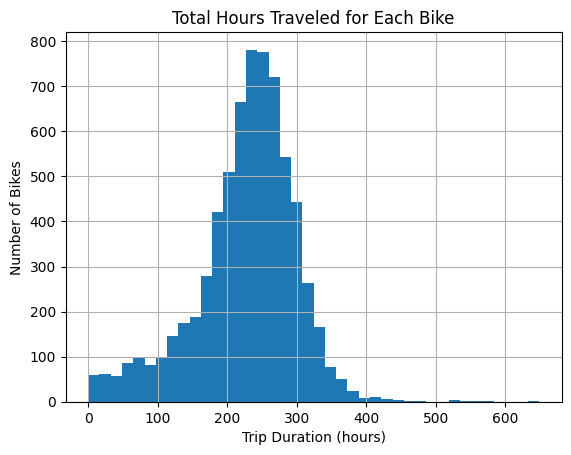

In [ ]:
df_td = (df.groupby('bikeid')['tripduration'].sum()/(60*60)).reset_index()
df_td = df_td[df_td['tripduration'] < 700]
df_td.hist('tripduration', bins=40);
plt.title('Total Hours Traveled for Each Bike')
plt.xlabel('Trip Duration (hours)')
plt.ylabel('Number of Bikes');

* According to Trek Bikes, "most **bikes need service for every 25 hours of riding time**"
* As can be seen, the trip duration for the vast majority of bikes is around ~250 hours, which would mean the bikes would have to **get repaired 10 times a year, or an average of about once a month** (barring a reported incident by a user that requires the bike to be repaired)
* For other bikes it would be fewer and for others it would be more repairs

---
**6.2.4 Which stations would need frequent replacement of bikes?**

---

The idea is to find places that might either have a surplus or a deficit. This is important in order for the company to have a better insight on their logistics.

In [ ]:
grouped_start = df.groupby(['start station name'])['start station name'].count().reset_index(name='count_start').sort_values(['count_start'],ascending=False)
grouped_end = df.groupby(['end station name'])['end station name'].count().reset_index(name='count_end').sort_values(['count_end'],ascending=False)
count_merged = pd.merge(grouped_end,grouped_start,left_on=['end station name'],right_on=['start station name'])
count_merged.drop(labels=['start station name'], axis=1, inplace=True)
count_merged.rename(columns={'end station name' :'station_name'},inplace=True)
count_merged['start_end_diff']=(count_merged['count_end'] - count_merged['count_start']).abs()
count_merged.sort_values(['start_end_diff'],ascending=False,inplace=True)
new_df = count_merged.head(25)
fig = px.bar(new_df, x='station_name', y='start_end_diff')
fig.update_layout(
    xaxis_title='Station Name',
    yaxis_title='Count Absolute Difference',
    title='Top 25 Stations with Highest Count Absolute Difference'
)
fig.show()

The above graph shows the stations with the 25 highest absolute difference in number of bikes. The graph can be used by Citi in order to find stations which would throughout the year need frequent bikes. Being unable to ensure the right amount of bikes in these stations might be quite expensive for the company. The first station, 8 ave and W 31 St has a huge difference. Furthermore, as seen in graphs above these stations also have high number of bike users.

---
**6.2.5 To break it down more specifically, what are some stations that usually people start/end with has the longest trip duration?**

---

After learning the difference between start and finish station, we wants to dig deeper: what about the specific stations in terms of starting and ending?

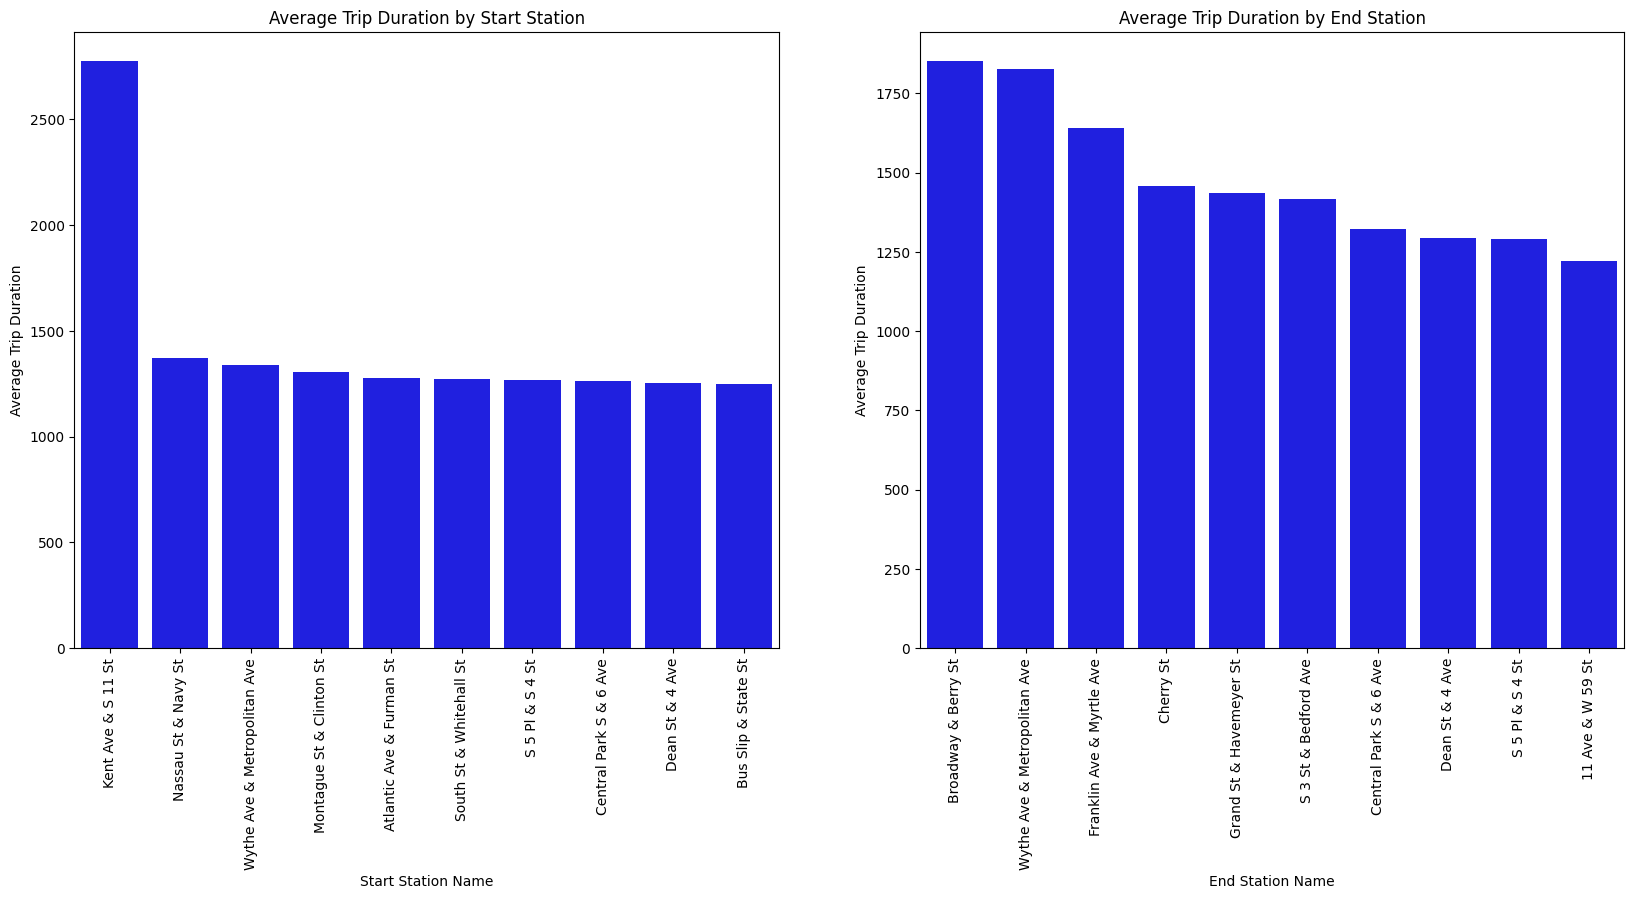

In [ ]:
avg_tripduration_by_startname = df.groupby('start station name')['tripduration'].mean().sort_values(ascending=False)
avg_tripdur_start = avg_tripduration_by_startname.head(10)

avg_tripduration_by_endname = df.groupby('end station name')['tripduration'].mean().sort_values(ascending=False)
avg_tripdur_end = avg_tripduration_by_endname.head(10)

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

# Plot the first graph in the first subplot
sns.barplot(x=avg_tripdur_start.index, y=avg_tripdur_start.values, color='blue', ax=axs[0])
axs[0].set_xlabel('Start Station Name')
axs[0].set_ylabel('Average Trip Duration (in seconds)')
axs[0].set_title('Top 10 Average Trip Duration by Start Station')
axs[0].tick_params(axis='x', rotation=90)

# Plot the second graph in the second subplot
sns.barplot(x=avg_tripdur_end.index, y=avg_tripdur_end.values, color='blue', ax=axs[1])
axs[1].set_xlabel('End Station Name')
axs[1].set_ylabel('Average Trip Duration (in seconds)')
axs[1].set_title('Top 10 Average Trip Duration by End Station')
axs[1].tick_params(axis='x', rotation=90)

# Show the plot
plt.show()



1. The beginning station with the highest average duration is the Kent Ave & S11 St that has a shockingly average trip duration above 2500 seconds, which the average bike trip is more than 40 minutes.
2. The two ending stations with the highest average durations are Broadway & Berry St and Wythe Ave & Metropolitan Ave. Both has an average trip duration around 1750 seconds, roughly equal to 30 minutes.
3. These above three stations all share an amusing fact is that they are all located in Brooklyn near the Williamsburg Bridge.

##6.3 Questions regrading population graph

---
**6.3.1 Are there any outliers in the birth year column?**

---

The motivation of this question is that since we already removed some null values from the column ‘birth year’, we want to check to make sure that the dataset does not contain any other outliers/missing birth year which would hinder the integrity and accurateness of our analysis.  


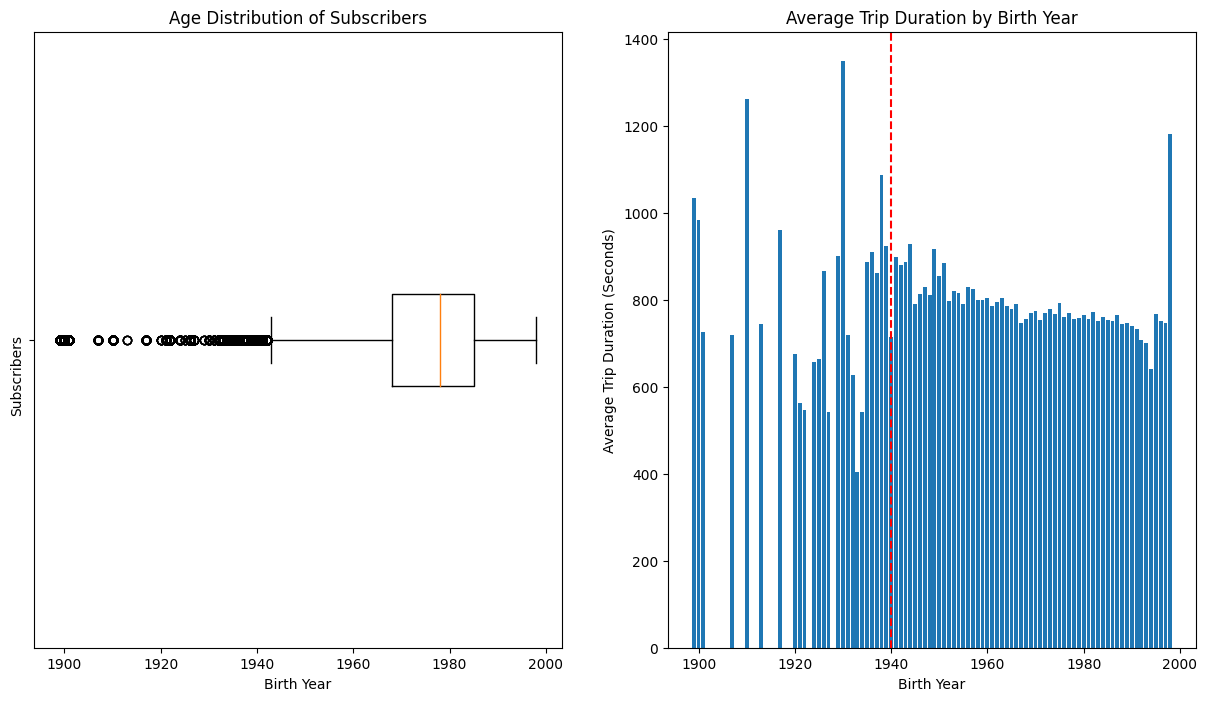

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 8),sharex=True)
ax1.boxplot(df['birth year'],vert=False)
avg_duration_by_birthyear = df.groupby('birth year')['tripduration'].mean().reset_index()

ax2.bar(x = avg_duration_by_birthyear['birth year'],
        height = avg_duration_by_birthyear['tripduration'])
ax1.set_xlabel('Birth Year')
ax1.set_yticklabels(['Subscribers'],rotation=90)
ax1.set_title('Age Distribution of Subscribers')
ax2.set_xlabel('Birth Year')
ax2.set_ylabel('Average Trip Duration (Seconds)')
ax2.set_title('Average Trip Duration by Birth Year')
ax2.axvline(x=1940, color='red', linestyle='--', label='Year 1940')

We first created a boxplot of the age distribution of subscribers to see if there are any outliers. We learned that the spread of the lower two quadrants is longer than the upper two quadrants. We also realized that there are few significant outliers lower than the birth year 1940.

To get a closer look, we then created a bar chart between birth year and the average trip duration. We used a red dashline to mark the year 1940. It is obvious to note that data before birth year 1940 is inconsistent, showing no patterns and have several missing years. We also learned that there is a significant increase in average trip duration of the latest legal year 1998 (legal bike sharing age is 16).

Aside from these two significant anomalies, we can tell there is a consistent pattern which as the birth year increases, the average trip duration decreases. Our hypothesis is that people would falsify their age by either meeting the minimum/maximum, or people could mis-scroll their age to become too early. To prevent these outliers from affecting our dataset and patterns, we decided to get rid of birthyear before 1940s and 1998.


---
**6.3.2 How different do men and women make use of rental bikes across the year 2014?**

---



The motivation behind this question is to find the usage of rental bikes by men and women in order to understand the target group as well as the areas of improvement.

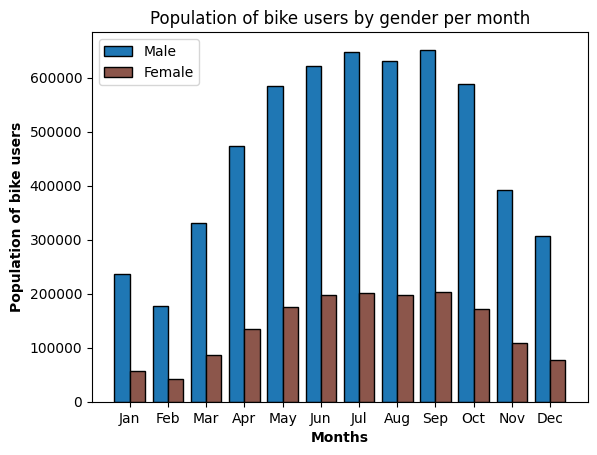

In [ ]:
male_pop = df.groupby('month')['gender'].apply(lambda x: (x==1).sum()).reset_index(name='male_pop')
female_pop = df.groupby('month')['gender'].apply(lambda x: (x==2).sum()).reset_index(name='female_pop')
data = pd.merge(male_pop,female_pop,on='month')
barWidth = 0.4
male = data['male_pop']
female = data['female_pop']
months=data['month']

x1 = np.arange(1,13)
x2 = [x + barWidth for x in x1]

plt.bar(x1, male, color='tab:blue', width=barWidth, edgecolor='black')
plt.bar(x2, female, color='tab:brown', width=barWidth, edgecolor='black')

plt.xlabel('Months', fontweight='bold')
plt.ylabel('Population of bike users', fontweight='bold')
plt.xticks([(r+0.8)+ barWidth for r in range(len(months))], ['Jan', 'Feb', 'Mar', 'Apr', 'May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

plt.legend(loc='upper left',labels=['Male', 'Female'])
plt.title('Population of bike users by gender per month')

plt.show()

Throughout the year, we can observe that men use rental bikes more than women. A similar upward or downward trend of usage is noticed for every month. This can be due to different reasons like climate changes or holiday season. However, it can be suggested that few strategic methods can be implemented in order to target women who constitute 52% of the total New York City population in 2014 (via New York State - Department of Health). This can heavily increase the revenue generated by the New York CitiBikes and also equally help women amidst difficult transportation situations in New York.




---
**6.3.3 How does the population of bike users differ based on Gender and Age Groups?**

---

In [ ]:
df['birth year'] = df['birth year'].astype(int)

# Calculate the current year
current_year = 2014

# Calculate the age
df['Age'] = current_year - df['birth year']
df = df[df['Age']<=64]
df = df[df['Age']>=18]
print(max(df['Age']))
# Define each bins
age_bins = [18, 24, 34, 44,54,64]
age_labels = ['18-24', '25-34', '35-44', '45-54', '55-64']

# Group  data by age groups
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

print(df[['birth year', 'Age', 'Age_Group']])

64
         birth year  Age Age_Group
0              1986   28     25-34
1              1963   51     45-54
2              1991   23     18-24
3              1989   25     25-34
4              1990   24     18-24
...             ...  ...       ...
7285904        1972   42     35-44
7285905        1978   36     35-44
7285906        1989   25     25-34
7285907        1980   34     25-34
7285908        1987   27     25-34

[7152961 rows x 3 columns]


In [ ]:
# Count the number of people in each age group
age_group_counts = df['Age_Group'].value_counts()

print(age_group_counts)

25-34    2819521
35-44    1886152
45-54    1299812
55-64     589776
18-24     543978
Name: Age_Group, dtype: int64


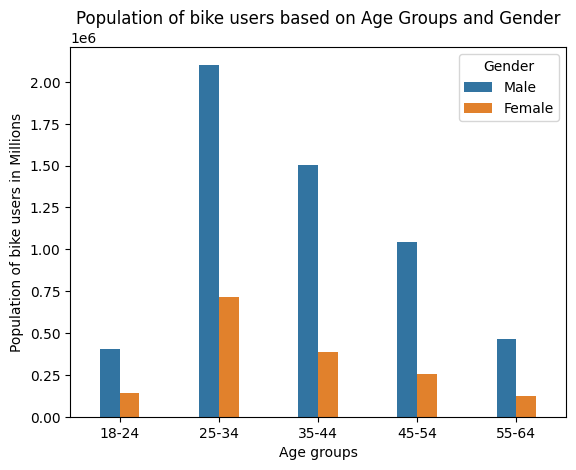

In [ ]:
sns.countplot(x='Age_Group',hue='gender',data=df,width=0.4)
plt.title('Population of bike users based on Age Groups and Gender')
plt.xlabel('Age groups')
plt.ylabel('Population of bike users in Millions')
plt.legend(labels=['Male','Female'],title='Gender')
plt.show();

The motivation behind the above question is to understand the bike users demographics and to concentrate on the target groups. According to the graph, it can understood that females use less rental bikes than men. However, females within the age groups of 25 and 34 years use more bikes than the other age groups. Infact, men within the same age group also make most usage of the bikes. So, this age group of individuals can be concentrated and better strategies can be implemented to attract them.

##6.4 Questions regarding trip duration

---
**6.4.1 How does the highest trip durations differ for each month throughout the year? Does this have any correlation with number of bike users?**

---



The idea behind this question is to understand the correlation between number of bike users and the time they spend on the bike.

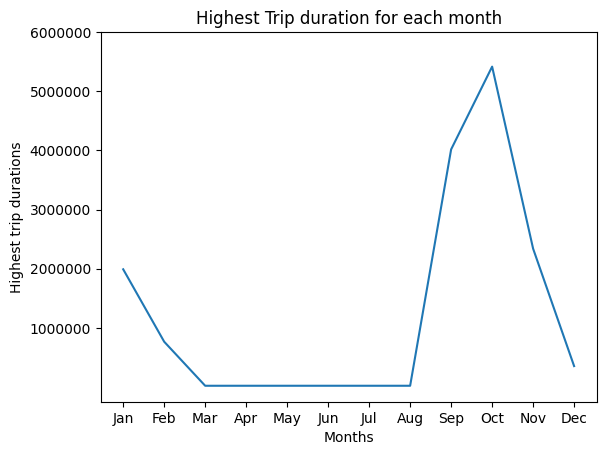

In [ ]:
df_max_td=df.groupby('month')['tripduration'].aggregate('max')
plt.plot(df_max_td)
plt.xlabel('Months')
plt.ylabel('Highest trip durations')
plt.xticks(ticks=['01-Jan','02-Feb','03-Mar','04-Apr','05-May','06-Jun','07-Jul','08-Aug','09-Sep','10-Oct','11-Nov','12-Dec'],labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.yticks(ticks=[1000000,2000000,3000000,4000000,5000000,6000000],labels=[1000000,2000000,3000000,4000000,5000000,6000000])
plt.title('Highest Trip duration for each month')
plt.show()


As we can see in the above two graphs, during the months between March and August, there is a significant rise in the number of bike users but there is a decline in the highest trip duration. This can be due to various reasons like increase in tourist visits during vacation periods or unsatisfactory maintanence of bikes in the midst of increased bike rentals.



---
**6.4.2 What is the relationship between trip duration and riders age and gender?**

---


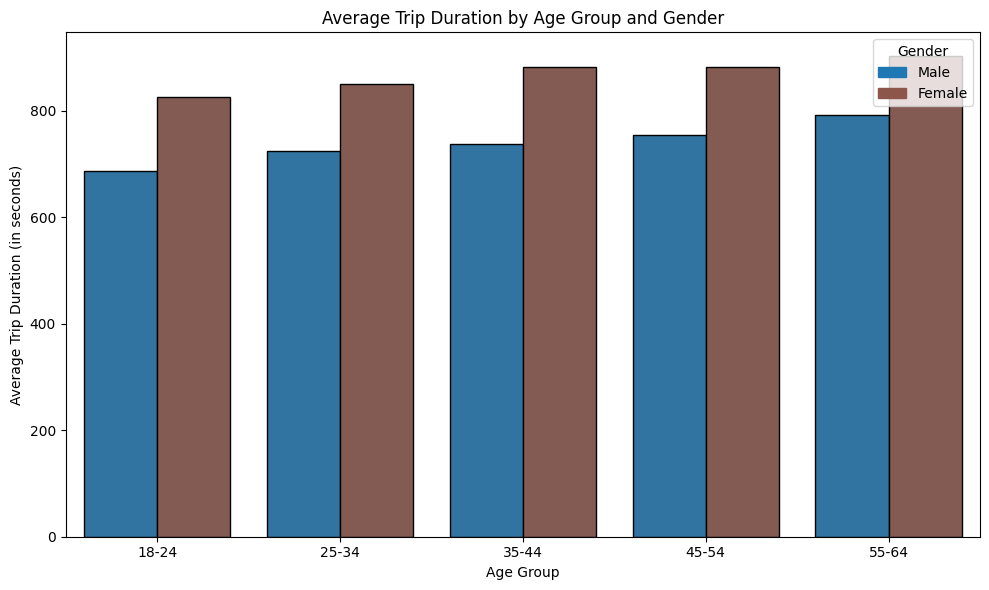

In [ ]:
# Group the data by 'Age_Group' and 'gender' and calculate the average trip duration
grouped_data = df.groupby(['Age_Group', 'gender'])['tripduration'].mean().reset_index()

custom_colors = {'Male': 'tab:blue', 'Female': 'tab:brown'}

# Create a bar graph
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_data, x='Age_Group', y='tripduration', hue='gender', palette = ['tab:blue','tab:brown'], edgecolor='black' )
plt.xlabel('Age Group')
plt.ylabel('Average Trip Duration (in seconds)')
plt.title('Average Trip Duration by Age Group and Gender')
plt.tight_layout()

#match the legend color with genders
legend_handles = [Patch(color=color, label=label) for label, color in custom_colors.items()]

plt.legend(handles=legend_handles, title='Gender')

plt.show()




Initially, we have questions about the relationship between their average trip duration and their gender and age. Futhermore, we want to know if there is anything we can explore further to target a specific group of riders.

Since we donnot have the age data, we used their birth year to figure out their age in the year of 2014, and then we grouped their customers into age groups as shown. From the visualization above, we can see that between the ages of 18 to 65, female riders rode the bikes longer than the male riders. This is an insight that management can investigate further to understand the reasons behind the difference. We can use this information to explore marketing strategies to target this finding.


# 7. Challenges



1.   We tried making the geospatial map by using geohashing, however, the limitation of it being a ‘squared’ region didn’t really show us which stations were the most popular, it just showed us which areas are the most popular which isn’t what the question was looking to answer.
1.   During the visualization process, we did not have enough tangible attributes to plot different graphs.
2.   During the data analysis process on the questions regarding demographics, we want to deep dive into the speed of each shared bike ride since the observation of different speeds between two stations can help companies optimize their bike fleet and improve route planning. But when we use the haversine formula to calculate the spherical distance between start and end station for each trip, we realized that we are making wrong assumptions of direct route and flat surface. Besides, we haven’t considered some external factors like urban environments, weather conditions, bike conditions, which will also potentially affect the speed.
4. As mentioned in a few sections of this analysis(fig ) the ```age``` column had a lot of outliers. These outliers didn't make sense as the earliest birthyear would make the age 114 years old. To avoid this we removed ages that were before and after a certain threshold(ages 16-64). We have given reasons for this oddity, mainly assuming it being a user-input.

<a id="4"></a>
# 8. Conclusions & Key Observations

## 8.1 Conclusions



During peak months (April-October), Citibike should work to add more bikes to the most popular pick up and drop off stations to guarantee that everyone has access to a bike. During off-peak months they can downsize. Citibike should also expand to other areas beyond just Midtown Manhattan and Downtown, and increase their accessibility in Upper East and West Side as well as other boroughs such as Brooklyn and Queens.

For Customers, we have observed that some might be spending more money by not becoming a subscriber. In this case we could tell them how beneficial to switch would be. This also benefits as a subscriber would mean a more steady and predictable revenue source for Citibikes.

The longer bike rides are taking place near bridges that go into other boroughs,presumably by people that use it to travel to said boroughs. Therefore, attention and resources should be invested in consistently repairing the bikes, but also quickly repairing them when necessary. To double down on this, most bikes need to be repaired for every 25 hours of ride time, and since most Citibikes are being used for approximately 250 hours, they should be maintained once a month. It is important to track the number of hours each bike is being used to keep up with maintenance procedures. Logistics needs to be taken into account as well and more popular stations need greater coverage.

Furthermore, females across ages have a higher average trip duration compared to males we also see that the former use Citibikes less frequently than the latter. As the ages increase the average trip duration increases as well.

Citibikes has a huge scope of expansion by considering areas on the upper side as well as aiming for more female users.

Given the observed patterns, citi bike should enhance the subscriber experience by ensuring bike availability during peak commute hours and optimizing station placements. Loyalty programs can further encourage subscriber usage during leisure times. For customers, consider flexible pricing or short-term promotions to spur impromptu rides. Collaborating with tourist sites or local events during weekends can also cater to the recreational trends seen in both groups. Tailored strategies like these can amplify user satisfaction and optimize service utilization.

## 8.2 Key Observations




*   Subscribers mainly use the service for work commutes on weekdays, while customers have varied, leisure-oriented patterns, especially during mid-day on weekends and holidays.
*   The consistent behavior of high-usage subscribers highlights the potential value in enhancing their user experience.
*   Midtown Manhattan is the most popular region for picking up Citibikes in NYC, whereas other areas of Manhattan and other boroughs are not as popular.
* Longest rides are starting near bridges that go into other boroughs of NYC.
* The majority of bikes need to be repaired at least 10 times a year based on the assumption that a bike needs to be repaired every 25 hours of ride time.
*   The most popular months for Citibike trips are from April-October, during the warmer months.
*   During the warmer months in NYC, there is still a substantial number of customers who use Citi Bike on a single-fee basis. These customers could potentially become subscribers of Citi Bikes.
*   The top 10 start and end stations, many of which are in tourist hotspots like the south of Central Park and Brooklyn Bridge.
*   A few of the stations, notably 8 Ave & W 31 St, has a huge difference between no of bikes available. These differences cost the company as it means either an excess of demand or an excess of supply. The company should look at the top 25 stations with this difference to increase revenue.
*   There is a steep decline in the duration of longest trip taken within the months of March and August 2014
*   Majority of subscribers are within the age groups of 25 and 34 years.
*   The number of trips fluctuates and increases from January to September, but declines after September
*   We initially investigated the relationship between average trip duration, gender, and age. We observed that female riders between 18 and 65 tended to ride longer than males, suggesting potential opportunities for targeted marketing strategies.
*   There is no clear pattern and missing age years before 1940, and the year 1998 also has a huge discrepancy from the general pattern.
*   Stations with high average trip duration tends to be near the bridge, which we presume people were trying to commute across bridges.





<a id="5"></a>
# 9. References

**Reference list**

Websites:
- Citibike data website (https://citibikenyc.com/system-data)
- NYC Public Transport Information (https://www.globenewswire.com/news-release/2014/12/09/1126354/0/en/SURVEY-U-S-Commuters-Wait-Approximately-40-Minutes-per-Day-for-Public-Transit-Costing-Them-150-Hours-per-Year.html)
- Trek Bikes: https://www.trekbikes.com/us/en_US/why-bikes-need-service/?fbclid=IwAR1iYM_TKF4x4PHSKWqiuMU-6xEAZIEakxLw5H5nip1nL9jg2m86LVNH7rI#:~:text=[…]ts%20last

- Plotly (https://plotly.com/python/)
- Plotly Density MapBox Documentation (https://plotly.com/python-api-reference/generated/plotly.express.density_mapbox)
- Python datetime Documentation (https://docs.python.org/3/library/datetime.html#strftime-strptime-behavior)

Journal articles:
- Waskom, M. L., (2021). seaborn: statistical data visualization. Journal of Open Source Software, 6(60), 3021, https://doi.org/10.21105/joss.03021.

StackOverflow:
- Montesano, F. (2013, November 5). Answer to How to change the tick labels on a boxplot in matplotlib? Retrieved from https://stackoverflow.com/questions/19792041/changing-x-axis-tick-labels-when-working-with-subplots
- McKinney, T. (2021, September 6). How to stop matplotlib repeating labels in legend? Retrieved from https://stackoverflow.com/questions/13588920/stop-matplotlib-repeating-labels-in-legend
- McKinney, T. (2022, September 5). Import multiple CSV files into pandas and concatenate into one DataFrame Retrieved from https://stackoverflow.com/questions/20906474/import-multiple-csv-files-into-pandas-and-concatenate-into-one-dataframe

Chatgpt and other AI models:


- When asked how to improve the age bins set up for the average trip duration and genders and age visualization? Chatgpt responded with the codes to improve age bins and age labels. OpenAI. (2021). ChatGPT (Version 3.5). https://www.openai.com/chatgpt


- When asked how to match the legend color with genders in the average trip duration and genders and age visualization? Chatgpt responded with the codes with patch and custom colors for the visualization. OpenAI. (2021). ChatGPT (Version 3.5). https://www.openai.com/chatgpt

- When asked how to generate and pivot new dataframes to format suitable for heatmap visualization? Chatgpt responded with the example codes and explanations of how to reshape the data and prepare them in heatmap generation. OpenAI. (2021). ChatGPT (Version 3.5). https://www.openai.com/chatgpt
